In [13]:
# from two_TrAdaBoostR2 import TwoStageTrAdaBoostR2 ##STrAdaBoost.R2
# from TwoStageTrAdaBoostR2 import TwoStageTrAdaBoostR2 ##two-stage TrAdaBoost.R2

import pandas as pd
import sys
import numpy as np
from pandas import DataFrame
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

from keras.models import Sequential, load_model, Model
from keras.layers import Input, Dense, Activation, Conv2D, Dropout, Flatten
from keras import optimizers, utils, initializers, regularizers
import keras.backend as K

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler #Importing the StandardScaler

from itertools import combinations

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats.stats import pearsonr
from math import sqrt

#Geo plotting libraries
import geopandas as gdp
from matplotlib.colors import ListedColormap
# import geoplot as glpt

import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn import linear_model
from keras.models import Sequential
from keras.callbacks import ModelCheckpoint
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.model_selection import KFold
import matplotlib.lines as mlines

import statistics 

from scipy.stats import rv_continuous
from scipy.stats import *

from statistics import mean
from sklearn.cluster import KMeans
from scipy.spatial import distance


######### Instance Transfer repositories ####################
from adapt.instance_based import TwoStageTrAdaBoostR2

print("Repositories uploaded!!")

Repositories uploaded!!


In [14]:
from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2
from sklearn.model_selection import GridSearchCV
from adapt.instance_based import KMM

print("Second Upload Completed!!")

Second Upload Completed!!


In [3]:
################################### Concrete ###########################################################################################################
ConcreteData_df = pd.read_excel('UCI_regression/Concrete/Concrete_Data.xls') ## 'Cement' found to be correlated at 0.4 :: 100
print("Concrete Data")
print("-------------------------------------------")
print(ConcreteData_df.shape)

# concrete_cols = ConcreteData_df.columns
# ss = StandardScaler()
# ConcreteData_df[concrete_cols] = ss.fit_transform(ConcreteData_df[concrete_cols])
# print(ConcreteData_df)


drop_col_concrete = ['Cement']

concrete_tgt_df = ConcreteData_df.loc[(ConcreteData_df['Cement'] <= 310)]
concrete_tgt_df = concrete_tgt_df.drop(drop_col_concrete, axis = 1)
concrete_tgt_df = concrete_tgt_df.reset_index(drop=True)
print("Target Set: ",concrete_tgt_df.shape, ((concrete_tgt_df.shape[0]/ConcreteData_df.shape[0])*100))

concrete_source_df = ConcreteData_df.loc[(ConcreteData_df['Cement'] > 310) & (ConcreteData_df['Cement'] <= 350)]
concrete_source_df = concrete_source_df.drop(drop_col_concrete, axis = 1)
concrete_source_df = concrete_source_df.reset_index(drop=True)
print("Source Set: ",concrete_source_df.shape, ((concrete_source_df.shape[0]/ConcreteData_df.shape[0])*100))

concrete_test_df = ConcreteData_df.loc[(ConcreteData_df['Cement'] > 350)]
concrete_test_df = concrete_test_df.drop(drop_col_concrete, axis = 1)
concrete_test_df = concrete_test_df.reset_index(drop=True)
print("Test Set: ",concrete_test_df.shape, ((concrete_test_df.shape[0]/ConcreteData_df.shape[0])*100))

#################### Splitting into features and target ####################
target_column_concrete = ['ConcreteCompressiveStrength']

concrete_tgt_df_y = concrete_tgt_df[target_column_concrete]
concrete_tgt_df_X = concrete_tgt_df.drop(target_column_concrete, axis = 1)

concrete_source_df_y = concrete_source_df[target_column_concrete]
concrete_source_df_X = concrete_source_df.drop(target_column_concrete, axis = 1)

concrete_test_df_y = concrete_test_df[target_column_concrete]
concrete_test_df_X = concrete_test_df.drop(target_column_concrete, axis = 1)

############## Merging the datasets ##########################################
concrete_X_df = pd.concat([concrete_tgt_df_X, concrete_source_df_X], ignore_index=True)
concrete_y_df = pd.concat([concrete_tgt_df_y, concrete_source_df_y], ignore_index=True)

concrete_np_train_X = concrete_X_df.to_numpy()
concrete_np_train_y = concrete_y_df.to_numpy()

concrete_np_test_X = concrete_test_df_X.to_numpy()
concrete_np_test_y = concrete_test_df_y.to_numpy()

concrete_np_train_y_list = concrete_np_train_y.ravel()
concrete_np_test_y_list = concrete_np_test_y.ravel()

src_size_concrete = len(concrete_source_df_y)
tgt_size_concrete = len(concrete_tgt_df_y)

print("-------------------------------------------")

################################################################################################################################################################

Concrete Data
-------------------------------------------
(1030, 9)
Target Set:  (653, 8) 63.398058252427184
Source Set:  (121, 8) 11.747572815533982
Test Set:  (256, 8) 24.854368932038835
-------------------------------------------


In [34]:
############# Transfer Learning specifications Concrete #########################

from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2


src_idx = np.arange(start=0, stop = (src_size_concrete - 1), step=1)
tgt_idx = np.arange(start=src_size_concrete, stop = ((src_size_concrete + tgt_size_concrete)-1), step=1)


def get_estimator(**kwargs):
    return DecisionTreeRegressor(max_depth = 6)

kwargs_TwoTrAda = {'steps': 30,
                    'fold': 10,
                  'learning_rate': 0.1}

print("Specification requirement complete!")

Specification requirement complete!


In [37]:
########################### TwoStagetrAdaBoostR2 Concrete #######################################

from adapt.instance_based import TrAdaBoost, TrAdaBoostR2, TwoStageTrAdaBoostR2


print("Two-Stage TrAdaboost.R2 (M + H, L)")
print("-------------------------------------------")

r2scorelist_TwoTrAda_concrete = []
rmselist_TwoTrAda_concrete = []

for x in range(0, 4):

    model_TwoTrAda_concrete = TwoStageTrAdaBoostR2(get_estimator = get_estimator, n_estimators = 1000, cv=10) #, kwargs_TwoTrAda)
    model_TwoTrAda_concrete.fit(concrete_np_train_X, concrete_np_train_y_list, src_idx, tgt_idx)

    y_pred_TwoTrAda_concrete = model_TwoTrAda_concrete.predict(concrete_np_test_X)
    
    mse_TwoTrAda_concrete = sqrt(mean_squared_error(concrete_np_test_y, y_pred_TwoTrAda_concrete))
    rmselist_TwoTrAda_concrete.append(mse_TwoTrAda_concrete)
        
    r2_score_TwoTrAda_concrete = pearsonr(concrete_np_test_y_list, y_pred_TwoTrAda_concrete)
    r2_score_TwoTrAda_concrete = (r2_score_TwoTrAda_concrete[0])**2
    r2scorelist_TwoTrAda_concrete.append(r2_score_TwoTrAda_concrete)


print("RMSE of Two-Stage TrAdaboost.R2:", statistics.mean(rmselist_TwoTrAda_concrete))
print("R^2 of TrAdaboostR2:", statistics.mean(r2scorelist_TwoTrAda_concrete))

print("-------------------------------------------")

Two-Stage TrAdaboost.R2 (M + H, L)
-------------------------------------------
RMSE of Two-Stage TrAdaboost.R2: 14.582486877132064
R^2 of TrAdaboostR2: 0.6125019055957691
-------------------------------------------


In [29]:
########################### AdaBoostR2 Concrete #####################################################

from sklearn.ensemble import AdaBoostRegressor


print("Adaboost.R2 (L + M, H)")
print("-------------------------------------------")

r2scorelist_Ada_concrete = []
rmselist_Ada_concrete = []

for x in range(0, 2):

    model_Ada_concrete = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 6), learning_rate = 0.1, n_estimators = 100) 
    model_Ada_concrete.fit(concrete_tgt_df_X, concrete_tgt_df_y)
    
    y_pred_ada_concrete = model_Ada_concrete.predict(concrete_np_test_X)
    
    mse_Ada_concrete = sqrt(mean_squared_error(concrete_np_test_y, y_pred_ada_concrete))
    rmselist_Ada_concrete.append(mse_Ada_concrete)
        
    r2_score_Ada_concrete = pearsonr(concrete_np_test_y_list, y_pred_ada_concrete)
    r2_score_Ada_concrete = (r2_score_Ada_concrete[0])**2
    r2scorelist_Ada_concrete.append(r2_score_Ada_concrete)


print("RMSE of Adaboost.R2:", statistics.mean(rmselist_Ada_concrete))
print("R^2 of AdaboostR2:", statistics.mean(r2scorelist_Ada_concrete))
print("\n")
print("RMSE of Adaboost.R2:", rmselist_Ada_concrete)
print("R^2 of AdaboostR2:", r2scorelist_Ada_concrete)

print("-------------------------------------------")

Adaboost.R2 (L + M, H)
-------------------------------------------


/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
/Users/shrey/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RMSE of Adaboost.R2: 16.415724044304717
R^2 of AdaboostR2: 0.6126660748483308


RMSE of Adaboost.R2: [16.686927605488663, 16.14452048312077]
R^2 of AdaboostR2: [0.6058907027228013, 0.6194414469738604]
-------------------------------------------


In [30]:
######################### Gradient Boosting Regression Transfer Learning Concrete #######################################

from sklearn.ensemble import GradientBoostingRegressor


print("Gradient Boosting Regression Transfer Learning (L + M, H)")
print("-------------------------------------------")

r2scorelist_GBRTL_concrete = []
rmselist_GBRTL_concrete = []

for x in range(0, 2):

    model_GBRTL_concrete = GradientBoostingRegressor(learning_rate = 0.1, max_depth = 6, n_estimators = 100, subsample = 0.5)
    model_GBRTL_concrete.fit(concrete_np_train_X, concrete_np_train_y_list)

    y_pred_GBRTL_concrete = model_GBRTL_concrete.predict(concrete_test_df_X) ##Using dataframe instead of the numpy matrix
    
    mse_GBRTL_concrete = sqrt(mean_squared_error(concrete_np_test_y, y_pred_GBRTL_concrete))
    rmselist_GBRTL_concrete.append(mse_GBRTL_concrete)
        
    r2_score_GBRTL_concrete = pearsonr(concrete_np_test_y_list, y_pred_GBRTL_concrete)
    r2_score_GBRTL_concrete = (r2_score_GBRTL_concrete[0])**2
    r2scorelist_GBRTL_concrete.append(r2_score_GBRTL_concrete)


print("RMSE of GBR:", statistics.mean(rmselist_GBRTL_concrete))
print("R^2 of GBR:", statistics.mean(r2scorelist_GBRTL_concrete))
print("\n")
print("RMSE of GBR:", rmselist_GBRTL_concrete)
print("R^2 of GBR:", r2scorelist_GBRTL_concrete)

print("-------------------------------------------")

Gradient Boosting Regression Transfer Learning (L + M, H)
-------------------------------------------
RMSE of GBR: 11.297287802466293
R^2 of GBR: 0.6852325217936286


RMSE of GBR: [11.203363954598267, 11.391211650334318]
R^2 of GBR: [0.6750797313177301, 0.6953853122695272]
-------------------------------------------


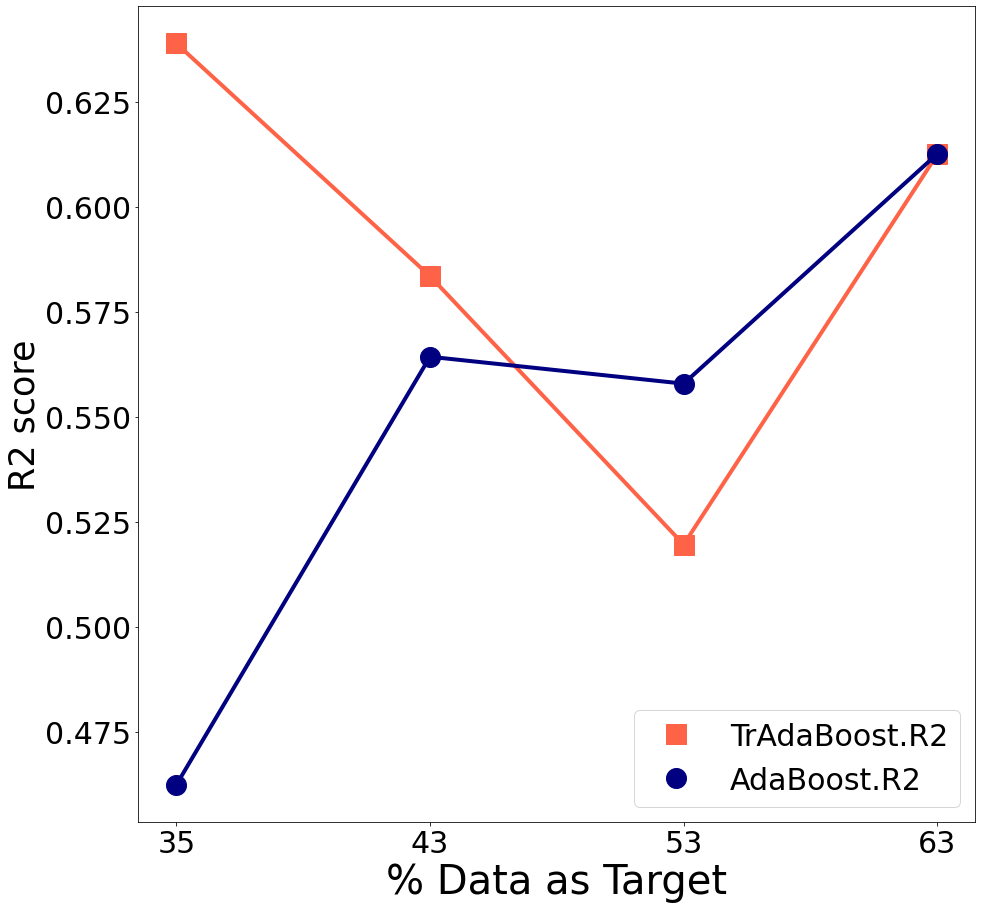

In [15]:
######################## Concrete #########################################################################
TrAdaboost_rmse = [14.5734, 14.8614, 16.9801, 14.5824]
Adaboost_rmse = [24.4403, 22.2673, 19.6041, 16.4157]
GBR_rmse = [11.4610, 11.0932, 11.7888, 11.2972]

TrAdaboost_r2 = [0.6389, 0.5835, 0.5196, 0.6125]
Adaboost_r2 = [0.4624, 0.5643, 0.5579, 0.6126]
GBR_r2 = [0.7007, 0.7009, 0.6808, 0.6852]


#############################################################################################################

xlim_list = [2, 4, 6, 8]
box = mlines.Line2D([], [], color = 'tomato', marker = 's', linestyle = 'None',markersize = 20, label = 'TrAdaBoost.R2')
circle = mlines.Line2D([], [], color = 'navy', marker = 'o', linestyle = 'None', markersize = 20, label='AdaBoost.R2')
# triangle = mlines.Line2D([], [], color = 'olive', marker = 'v', linestyle = 'None', markersize = 20, label='GBR.TL')



# line1 = mlines.Line2D([], [], color = 'black', marker='None',linestyle='-',
#                           markersize = 30, label='Case 1', linewidth = 6.0)
# line2 = mlines.Line2D([], [], color = 'black', marker='None', linestyle='--',
#                           markersize = 30, label='Case 2', linewidth = 6.0)
# line3 = mlines.Line2D([], [], color = 'black', marker='None', linestyle=':',
#                           markersize = 30, label='Case 3', linewidth = 6.0)

plt.figure(figsize = (15,15))

plt.plot(xlim_list, TrAdaboost_r2, '-s', color = 'tomato', linewidth = 4.0, markersize = 20)
plt.plot(xlim_list, Adaboost_r2, '-o', color = 'navy', linewidth = 4.0, markersize = 20)
# plt.plot(xlim_list, GBR_r2, '-v', color = 'olive', linewidth = 4.0, markersize = 20)

# plt.plot(xlim_list, tradaboostr2_vals_c1, '-ok', color = 'navy', linewidth = 4.0, markersize = 20)
# plt.plot(xlim_list, tradaboostr2_vals_c2, '--ok', color = 'navy', linewidth = 4.0, markersize = 20)
# plt.plot(xlim_list, tradaboostr2_vals_c3, ':ok', color = 'navy', linewidth = 4.0, markersize = 20)

plt.xticks([2, 4, 6, 8], [35, 43, 53, 63], fontsize = 30)
plt.yticks(fontsize = 30)

plt.ylabel('R2 score', fontsize = 35)
plt.xlabel('% Data as Target', fontsize = 40)

plt.legend(handles= [box, circle], fontsize = 30, loc='lower right')

# plt.title('UCI Auto MPG dataset', fontsize = 28)
plt.savefig("paper_negative_transfer")
plt.show()




In [ ]:
import numpy as np


def augmented_euclidean_dist(a, b):
    # Write your code here.
    # Remember to return the right object.
    
    for idx in range(0,len(a)):
            if a == -999:

        while len(a) != 0:
            a.remove(-999)
    
    pass

In [23]:
import numpy as np

# a = np.array([-999.0, 0.1, 2.3, 0.4])
# b = np.array([9.0, 1.2, -999, 0.5])

a = np.array([  1.  ,   2.  ,   3.  ,   5.5 ,  23.23, -11.11])
b = np.array([  1.  ,   2.  ,   3.  ,   5.5 ,  23.23, -11.11])

# a, b = list(zip(*[(a, b) for a, b in zip(a, b) if a == -999.0 and b == -999]))

i = 0
# for i in range(0, (a.size - 1)):
while i < (a.size - 1):
    if a[i] == -999.0:
        a = np.delete(a,i)
        b = np.delete(b,i)
        i = i + 1
        print(a)
        print(b)
    elif b[i] == -999.0:
        a = np.delete(a,i)
        b = np.delete(b,i)
        i = i + 1
        print(a)
        print(b)
    else:
        i = i + 1
    
if a.size < 2 and b.size < 2:
    print("No")
else:
    temp = a - b
    sum_sq = np.dot(temp.T, temp)
    dist = np.sqrt(sum_sq)
    print(dist)



0.0


In [32]:
a = np.array([-2, -1.4, -1.1, 0, 1.2, 2.2, 3.1, 4.4, -999.0, 9.9, -999.0, 14, 16.2])

# for num in a:
#     if num != -999.0:
#         if num > 0.0:
            
a = np.array( [num for num in a if (num == -999.0) or (num > 0.0)] )
a

array([   1.2,    2.2,    3.1,    4.4, -999. ,    9.9, -999. ,   14. ,
         16.2])